In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
temp = pd.read_csv('temp.csv')

In [3]:
df = temp[:365]
df

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
360,1981-12-27,15.5
361,1981-12-28,13.3
362,1981-12-29,15.6
363,1981-12-30,15.2


In [4]:
#creating moving averages for different intervals

df['3DMA'] = df['Temp'].rolling(window = 3).mean()

df['7DMA'] = df['Temp'].rolling(window = 7).mean()

df['30DMA'] = df['Temp'].rolling(window = 30).mean()

df.head(15)

<ipython-input-4-51a8bb5b8f95>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['3DMA'] = df['Temp'].rolling(window = 3).mean()
<ipython-input-4-51a8bb5b8f95>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['7DMA'] = df['Temp'].rolling(window = 7).mean()
<ipython-input-4-51a8bb5b8f95>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

,Date,Temp,3DMA,7DMA,30DMA
0,1981-01-01,20.7,NaN,NaN,NaN
1,1981-01-02,17.9,NaN,NaN,NaN
2,1981-01-03,18.8,19.133333,NaN,NaN
3,1981-01-04,14.6,17.100000,NaN,NaN
4,1981-01-05,15.8,16.400000,NaN,NaN
5,1981-01-06,15.8,15.400000,NaN,NaN
6,1981-01-07,15.8,15.800000,17.057143,NaN
7,1981-01-08,17.4,16.333333,16.585714,NaN
8,1981-01-09,21.8,18.333333,17.142857,NaN
9,1981-01-10,20.0,19.733333,17.314286,NaN


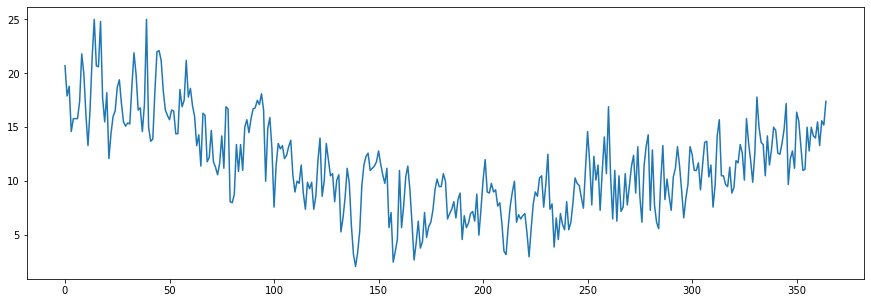

In [5]:
plt.figure(figsize = (15,5))

plt.plot(df.Temp);

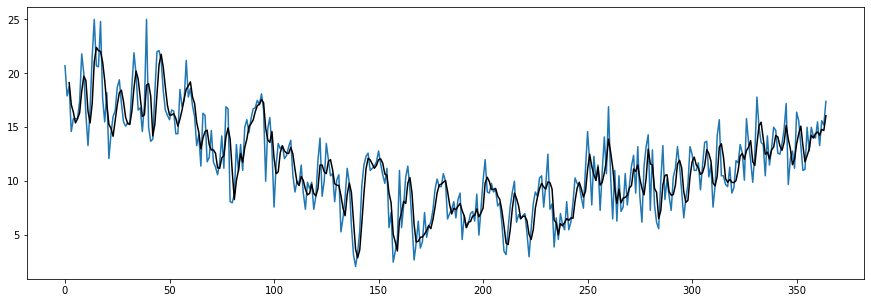

In [6]:
plt.figure(figsize = (15,5))

plt.plot(df.Temp)
plt.plot(df['3DMA'].dropna(), color = 'black');   #3 day moving average is doing good with real data

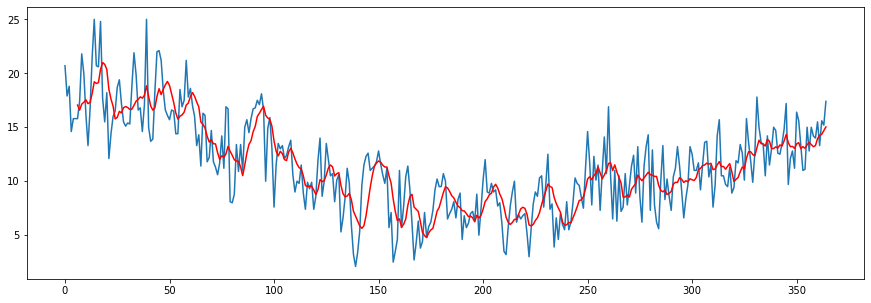

In [7]:
plt.figure(figsize = (15,5))

plt.plot(df.Temp)
plt.plot(df['7DMA'].dropna(), color = 'red');   #7DMA is not capturing the trend good enough

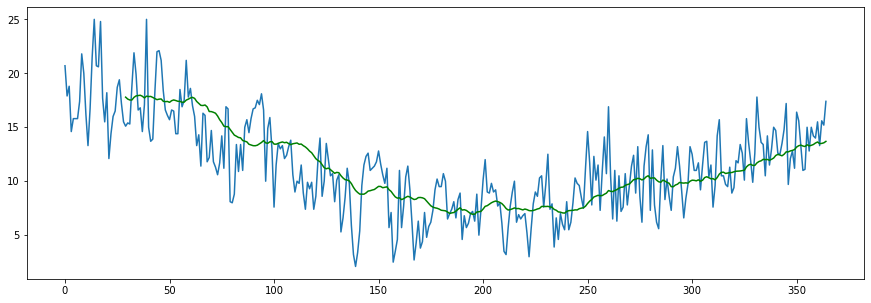

In [8]:
plt.figure(figsize = (15,5))

plt.plot(df.Temp)
plt.plot(df['30DMA'].dropna(), color = 'green');    #30DMA is showing the trend

### ARMA - auto regression moving averages

In [9]:
# p = AR, q = MA

# AR(p) makes predictions using previous values of the dependent variable.
# MA(q) makes predictions using the series mean and previous errors.

from statsmodels.tsa.arima_model import ARMA

x = df.Temp
train = x[1:350]
test  = x[350:]

model = ARMA(train, order = (0,3)).fit()

C:\Users\ganesh\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [12]:
preds = model.predict(349,363); preds

350    12.205503
351    11.326863
352    11.144642
353    11.390512
354    11.390512
355    11.390512
356    11.390512
357    11.390512
358    11.390512
359    11.390512
360    11.390512
361    11.390512
362    11.390512
363    11.390512
364    11.390512
dtype: float64

In [13]:
#mse

from sklearn.metrics import mean_squared_error, mean_absolute_error
error = mean_squared_error(test,preds); error

11.490805027636748

In [14]:
error = mean_absolute_error(test, preds); error

3.026593222384391

In [15]:
# MAPE : mean absolute percentage error

mape = error/len(test) * 100; mape

20.177288149229273

In [16]:
model = ARMA(train, order = (2, 3)).fit()   #this will throw an error as our TS is not stationary. We have to make it stationary

C:\Users\ganesh\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

ARMA
ARIMA

test - Dickey Fuller's test. This tells us if the Time Series is stationary or not

1. we need to check if our TS is stationary or not
2. If not stationary we need to make the TS sttionary
3. Build the model

### Dickey Fuller's Test

In [17]:
temp = pd.read_csv('temp.csv')

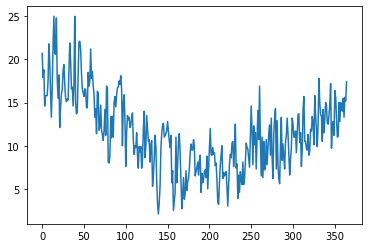

In [18]:
temp = temp[:365]
plt.plot(temp.Temp);

In [19]:
#checking std dev and mean over different days to check stationarity

print('Mean: ', temp.Temp[:10].mean())
print('Std dev: ', temp.Temp[:10].std())

Mean:  17.86
Std dev:  2.4180800464647794


In [20]:
print('Mean: ', temp.Temp[10:20].mean())
print('Std dev: ', temp.Temp[10:20].std())

Mean:  19.2
Std dev:  3.9510898637098992


In [21]:
print('Mean: ', temp.Temp[20:30].mean())
print('Std dev: ', temp.Temp[20:30].std())

Mean:  16.309999999999995
Std dev:  2.1921323966504493


In [22]:
print('Mean: ', temp.Temp[300:310].mean())
print('Std dev: ', temp.Temp[300:310].std())

Mean:  11.610000000000001
Std dev:  1.3811830677599064


In [23]:
#we can observe that mean and std dev are varying. so we might say it is non-stationary. but we can do ADF to find out.

In [24]:
## ADF test = Augmented Dickey Fuller's test
# used to check stationarity of time series

#null hypothesis = It is not stationary
#alternate hyp   = it is stationary

#threshold p-value = 0.05 (significance level)
#if p-value < 0.05, reject null hypothesis and time series is stationary

from statsmodels.tsa.stattools import adfuller

In [25]:
adfuller(temp.Temp)  #second value is the p-value. since its not less than 0.05 we cannot reject null hypo. Series is nonstationary

(-2.454951880116608,
 0.12682316388801912,
 6,
 358,
 {'1%': -3.448748905151901,
  '5%': -2.8696473721448728,
  '10%': -2.5710891239349585},
 1607.4780885337195)

In [26]:
# in a more presentable way, we create  function

def adfuller_test(val):
    result = adfuller(val)
    labels = ['ADF Test Statistics', 'p-value', 'Lags','Number of observations']
    
    for value, label in zip(result , labels):
        print(label + ' : ' + str(value))
        
    if result[1] < 0.05:
        print('Strong evidence against Null Hypothesis, reject null model. Time series is Stationary')
    else:
        print('Weak evidence agianst Null Hypothesis, accept null model. Time series is Non Stationary')

In [27]:
adfuller_test(temp.Temp)   #Number of lags used in regression to determine t-statistic. So there are no auto correlations going back to 6 periods here.

ADF Test Statistics : -2.454951880116608
p-value : 0.12682316388801912
Lags : 6
Number of observations : 358
Weak evidence agianst Null Hypothesis, accept null model. Time series is Non Stationary


We can make our series stationary by inducing differenct methods

1. Differencing
2. Square root
3. Cube root
4. Log values

In [28]:
# Differencing

#we add a column which is difference between 
temp['1st differencing'] = temp.Temp - temp.Temp.shift(1)
temp

,Date,Temp,1st differencing
0,1981-01-01,20.7,NaN
1,1981-01-02,17.9,-2.8
2,1981-01-03,18.8,0.9
3,1981-01-04,14.6,-4.2
4,1981-01-05,15.8,1.2
...,...,...,...
360,1981-12-27,15.5,1.5
361,1981-12-28,13.3,-2.2
362,1981-12-29,15.6,2.3
363,1981-12-30,15.2,-0.4


In [29]:
adfuller_test(temp['1st differencing'].dropna())

ADF Test Statistics : -7.558332159146342
p-value : 3.057032885853474e-11
Lags : 17
Number of observations : 346
Strong evidence against Null Hypothesis, reject null model. Time series is Stationary


In [30]:
#2nd differencing

temp['2nd differencing'] = temp['1st differencing'] - temp['1st differencing'].shift(1)
temp

,Date,Temp,1st differencing,2nd differencing
0,1981-01-01,20.7,NaN,NaN
1,1981-01-02,17.9,-2.8,NaN
2,1981-01-03,18.8,0.9,3.7
3,1981-01-04,14.6,-4.2,-5.1
4,1981-01-05,15.8,1.2,5.4
...,...,...,...,...
360,1981-12-27,15.5,1.5,1.7
361,1981-12-28,13.3,-2.2,-3.7
362,1981-12-29,15.6,2.3,4.5
363,1981-12-30,15.2,-0.4,-2.7


In [31]:
adfuller_test(temp['2nd differencing'].dropna())

ADF Test Statistics : -8.830005396162107
p-value : 1.7803730693890702e-14
Lags : 17
Number of observations : 345
Strong evidence against Null Hypothesis, reject null model. Time series is Stationary


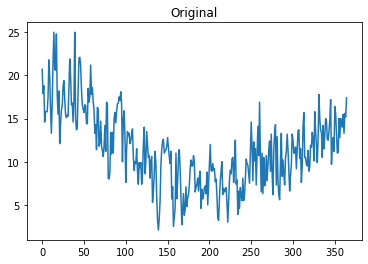

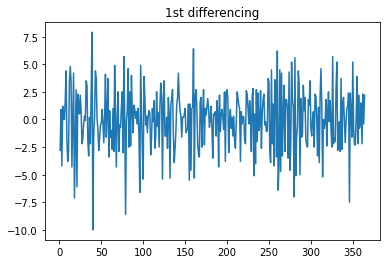

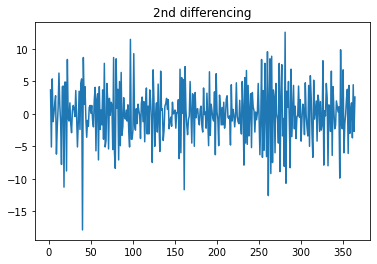

In [32]:
plt.plot(temp.Temp)
plt.title('Original')
plt.show()

plt.plot(temp['1st differencing'].dropna())
plt.title('1st differencing')
plt.show()

plt.plot(temp['2nd differencing'].dropna())
plt.title('2nd differencing')
plt.show()

In [33]:
from statsmodels.tsa.arima_model import ARMA

train = temp['1st differencing'][1:350]
test = temp['1st differencing'][350:]

model = ARMA(train, order = (2,3)).fit()

C:\Users\ganesh\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [34]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:       1st differencing   No. Observations:                  349
Model:                     ARMA(2, 3)   Log Likelihood                -805.062
Method:                       css-mle   S.D. of innovations              2.426
Date:                Sun, 06 Feb 2022   AIC                           1624.124
Time:                        14:09:59   BIC                           1651.109
Sample:                             0   HQIC                          1634.866
                                                                              
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.0164      0.020     -0.832      0.406      -0.055       0.022
ar.L1.1st differencing    -0.3203      0.334     -0.959      0.338      -0.975       0.334
ar.L2.1st differencing     0.3195      0.131      2.435      0.015       0.062       0.577
ma.L1.1st differencing    -0.1176      0.337     -0.349      0.727      -0.777       0.542
ma.L2.1st differencing    -0.7311      0.209     -3.503      0.000      -1.140      -0.322
ma.L3.1st differencing    -0.0040      0.131     -0.031      0.976      -0.261       0.253
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3376           +0.0000j            1.3376            0.5000
AR.2            2.3403           +0.0000j            2.3403            0.0000
MA.1            1.0888           +0.0000j            1.0888            0.0000
MA.2           -1.2574           +0.0000j            1.2574            0.5000
MA.3         -181.6277           +0.0000j          181.6277            0.5000
-----------------------------------------------------------------------------
"""

In [35]:
final_df = []

for p in range(5):
    for q in range(3):
        
        model = ARMA(train, order = (p,q)).fit()
        preds = model.predict(349, 363)
        
        final_df.append([p, q, mean_squared_error(test, preds), mean_absolute_error(test, preds)])

C:\Users\ganesh\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\ganesh\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.

C:\Users\ganesh\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\ganesh\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.

In [36]:
pd.DataFrame(final_df, columns = ['AR(p)', 'MA(q)', 'MSE', 'MAE'])

,AR(p),MA(q),MSE,MAE
0,0,0,5.437910,1.904852
1,0,1,4.955115,1.856203
2,0,2,4.902328,1.877830
3,1,0,5.183909,1.875577
4,1,1,5.075613,1.892268
5,1,2,5.092099,1.898764
6,2,0,5.223898,1.890301
7,2,1,5.090626,1.898478
8,2,2,4.993442,1.875571
9,3,0,5.539479,1.939041


What sets ARMA and ARIMA apart is differencing. An ARMA model is a stationary model; If your model isn’t stationary, then you can achieve stationarity by taking a series of differences. The “I” in the ARIMA model stands for integrated; It is a measure of how many non-seasonal differences are needed to achieve stationarity. If no differencing is involved in the model, then it becomes simply an ARMA.

In [39]:
# ARIMA : autoregressive integrated moving average

#p : Auto Regression
#d : differencing
#q : moving averages part

from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(temp.Temp, order = (5, 1, 2)).fit()

C:\Users\ganesh\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\ganesh\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.

In [41]:
preds = model.predict(349, 363); preds    #???

349   -0.089966
350    1.147236
351   -1.969439
352   -1.160864
353   -0.154398
354    0.794386
355    1.156778
356   -0.913534
357    0.040313
358   -0.923064
359   -0.734353
360   -0.142958
361   -1.250483
362    0.167596
363   -1.017191
dtype: float64

In [40]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.Temp   No. Observations:                  364
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -836.729
Method:                       css-mle   S.D. of innovations              2.407
Date:                Sun, 06 Feb 2022   AIC                           1691.458
Time:                        14:10:29   BIC                           1726.532
Sample:                             1   HQIC                          1705.398
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0107      0.020     -0.537      0.591      -0.050       0.028
ar.L1.D.Temp    -0.1566      0.338     -0.464      0.643      -0.819       0.506
ar.L2.D.Temp     0.2469      0.163      1.516      0.130      -0.072       0.566
ar.L3.D.Temp    -0.0090      0.061     -0.147      0.883      -0.129       0.111
ar.L4.D.Temp    -0.0348      0.059     -0.590      0.555      -0.150       0.081
ar.L5.D.Temp     0.0510      0.063      0.812      0.417      -0.072       0.174
ma.L1.D.Temp    -0.2838      0.335     -0.846      0.397      -0.941       0.373
ma.L2.D.Temp    -0.5776      0.301     -1.918      0.055      -1.168       0.013
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.4378           -0.6897j            1.5947           -0.4288
AR.2           -1.4378           +0.6897j            1.5947            0.4288
AR.3            1.7737           -0.0000j            1.7737           -0.0000
AR.4            0.8920           -1.8847j            2.0851           -0.1796
AR.5            0.8920           +1.8847j            2.0851            0.1796
MA.1            1.0928           +0.0000j            1.0928            0.0000
MA.2           -1.5841           +0.0000j            1.5841            0.5000
-----------------------------------------------------------------------------
"""